<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>



# Laboratorio de Codificación de Variables Categóricas

AutoRenew, la empresa líder en la venta de coches de segunda mano, continúa con el desarrollo del modelo predictivo que ayudará a estimar el precio de los vehículos usados. Hasta ahora, has realizado un análisis exploratorio, gestionado los valores nulos y tratado los outliers en el conjunto de datos. El siguiente paso en el proceso de preprocesamiento es manejar las variables categóricas para que el modelo de machine learning pueda interpretarlas correctamente.

En este laboratorio, te centrarás en la **codificación de variables categóricas**. Dado que los modelos de machine learning requieren datos numéricos para funcionar, es crucial convertir las variables categóricas en un formato que los algoritmos puedan procesar. Trabajarás con el mismo conjunto de datos que has utilizado en los laboratorios anteriores, enfocándote ahora en transformar las columnas categóricas de manera efectiva.

**Instrucciones:**

1. **Identificación de Variables Categóricas:** Revisa el conjunto de datos e identifica las columnas que contienen variables categóricas. Estas son las columnas que contienen texto o categorías que necesitan ser transformadas en valores numéricos para ser utilizadas en el modelo de machine learning.

2. **Selección de Técnicas de Codificación:** Decide qué técnica(s) de codificación aplicar a cada variable categórica. Algunas de las opciones que tienes son:

   - **Label Encoding:** Asigna un número único a cada categoría dentro de una variable.

   - **One-Hot Encoding:** Crea nuevas columnas binarias (0/1) para cada categoría única en una variable.

   - **Target Encoding:** Utiliza la media del target (en este caso, el `price`) para codificar las categorías, si consideras que podría ser útil.

3. **Aplicación de la Codificación:** Implementa las técnicas seleccionadas en las variables categóricas. Asegúrate de revisar cómo estas transformaciones afectan el conjunto de datos y de mantener un registro de los cambios realizados.

4. **Verificación del Conjunto de Datos Transformado:** Una vez que hayas aplicado la codificación, verifica que el conjunto de datos resultante esté listo para ser utilizado en el modelo de machine learning. Asegúrate de que no queden variables categóricas sin codificar y que la estructura del conjunto de datos sea adecuada para el análisis.

**Nota:** Este laboratorio es parte de una serie continua en la que utilizas el mismo conjunto de datos a lo largo de la semana. Documenta bien los pasos que sigas, ya que esta codificación será clave para los modelos que desarrollarás más adelante.



In [3]:
!pip install category_encoders


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
# Importación de las clases creadas en nuestro archivo de soporte
# -----------------------------------------------------------------------
from src import soporte_encoding as se


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder

In [6]:
df = pd.read_csv("datos/online_shoppers_intention_clase_nonulls_estan_sinout.csv", index_col = 0)
df.head(2)

,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,price_knn,monthOfRegistration_knn,powerCV_estandar,kilometer_estandar,yearOfRegistration_estandar
0,Golf_3_1.6,private,offer,test,Unknown,manually,golf,petrol,volkswagen,Unknown,2016-03-24,49751,2016-04-07 03:16:57,2990.0,6.0,-0.052593,0.607813,-0.016995
1,A5_Sportback_2.7_Tdi,private,offer,test,coupe,manually,Unknown,diesel,audi,yes,2016-03-24,66954,2016-04-07 01:46:50,18300.0,5.0,0.385348,-0.015437,0.069147


In [3]:
df.drop(columns=['name','lastSeen'], inplace=True)         #eliminamos columna lastseen puesto que no es   
                                                            # relevante para nuestro estudio.
                                                            #eliminamos name puesto que tenemos modelo y marca y tipo de vehiuclo.
                                                            #tendriamos la informacion suficiente.

In [4]:
# primero vamos a sacar los nombres de las columnas que son de tipo categórico
lista_col_categ = df.select_dtypes(include = "O").columns.tolist()
lista_col_categ

['seller',
 'offerType',
 'abtest',
 'vehicleType',
 'gearbox',
 'model',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'dateCreated']

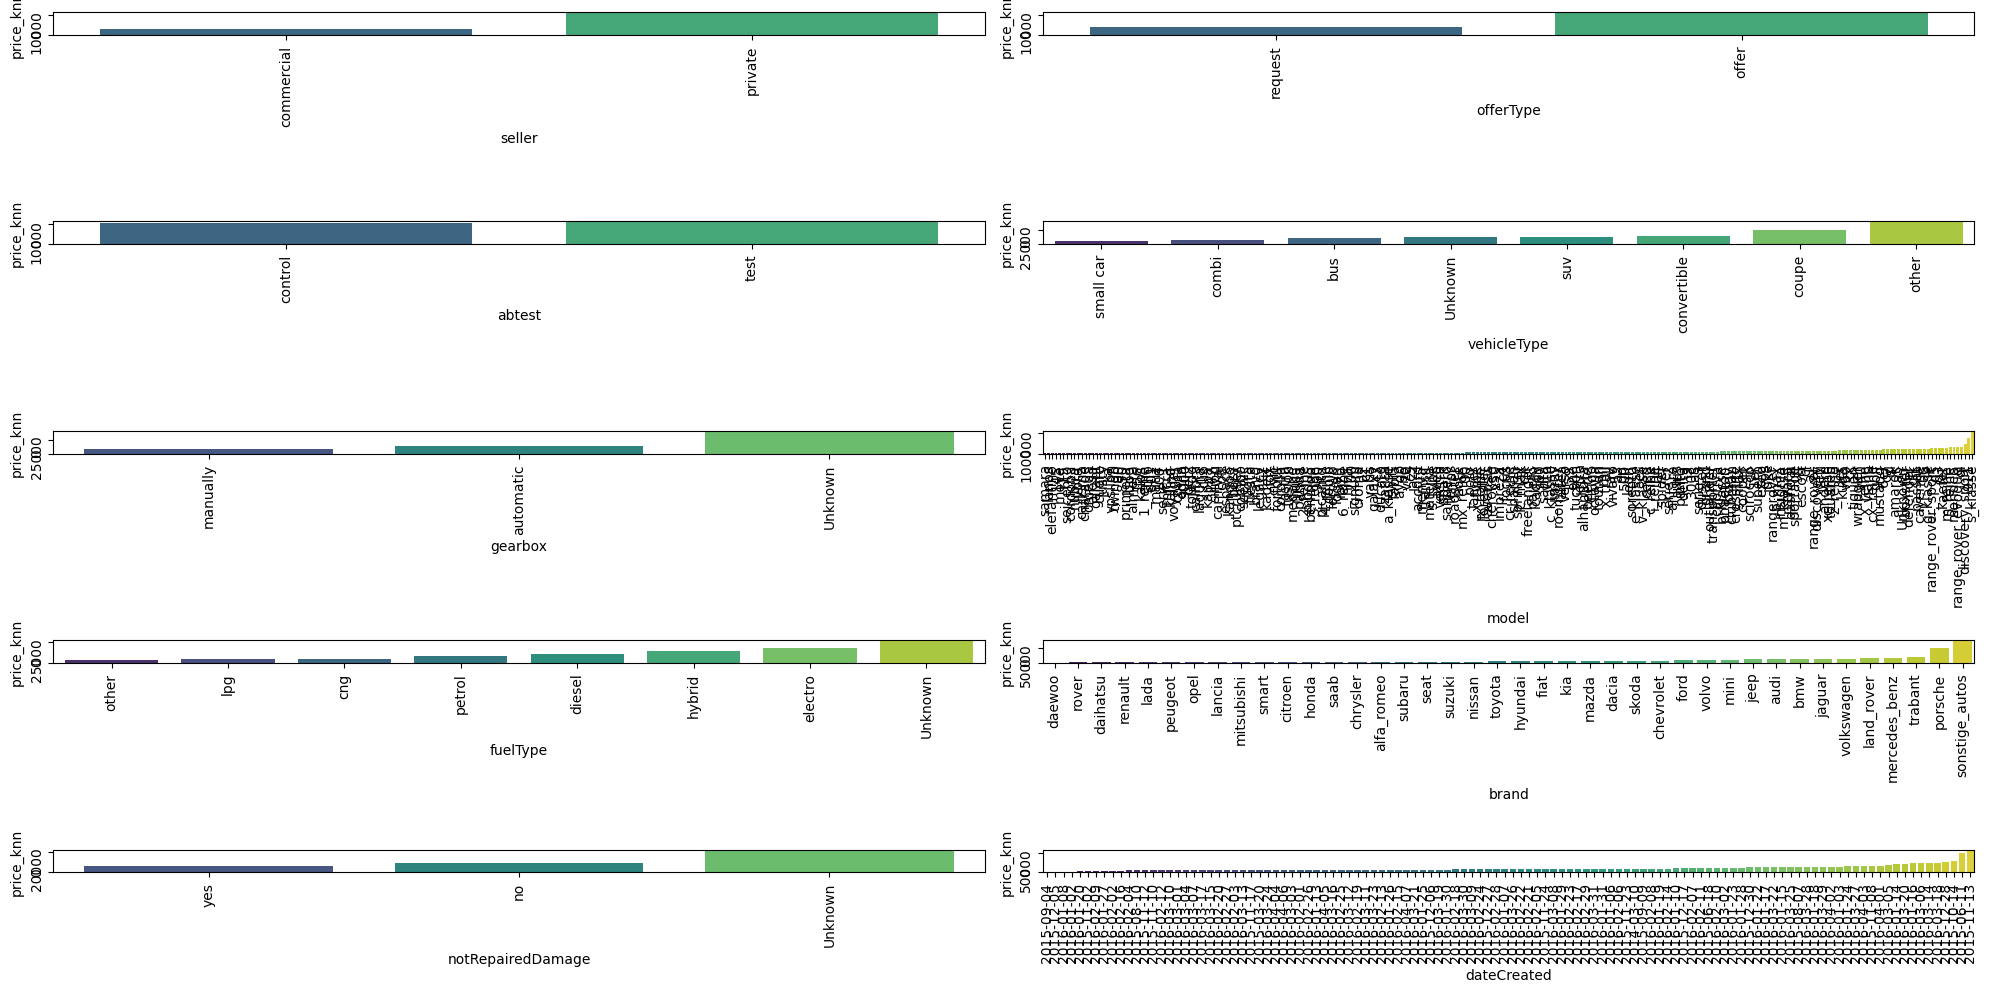

In [5]:
# instanciamos la clase de Encoding
analisis_encoding = se.Analisis_Visual_Encoding(variable_respuesta = "price_knn", dataframe = df, lista_variables_categorias = lista_col_categ)

# llamamos al método para hacer las gráficas
analisis_encoding.crear_barplot()

En este análisis, se observa que todas las variables categóricas, al ser contrastadas con la variable respuesta, muestran variaciones en sus magnitudes. Esta observación sugiere la posibilidad de una estructura ordenada en las variables. Sin embargo, esto no lo determina todo y deberíamos explorar más a fondo la presencia de un orden significativo en el conjunto de datos.

In [6]:
# instanciamos la clase de Asunciones, para poder decir qué método usar para el análisis estadístico
asunciones = se.Asunciones(dataframe = df, columna_numerica = "price_knn")
print("\n-------------\n")


for categoria in lista_col_categ:   

    print(f"Estamos analizando la variable {categoria.upper()}")
    
    # comprobamos la asunción de normalidad
    asunciones.identificar_normalidad(metodo = "kolmogorov") 

    # comprobamos la homogeneidad de varianzas
    asunciones.identificar_homogeneidad(columna_categorica = categoria)

    # instanciamos la clase para evaluar si hay diferencias entre los distintos grupos de las variables categóricas
    test = se.TestEstadisticos(df, "price_knn", categoria)
    test.run_all_tests()
    print("\n###########################\n")


-------------

Estamos analizando la variable SELLER
Para la columna price_knn, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable seller las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['private', 'commercial']

Realizando test de Mannwhitneyu...
Estadístico del Test de Mann-Whitney U: 738945.5
Valor p: 0.327925139172358
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,8048.8189,0.9827,-720141.0727,736238.7106,commercial-private



###########################

Estamos analizando la variable OFFERTYPE
Para la columna price_knn, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable offerType las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['offer', 'request']

Realizando test de Mannwhitneyu...
Estadístico del Test de Mann-Whitney U: 3404752.5
Valor p: 0.0015484394852372317
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-7061.1487,0.9697,-371160.5045,357038.2071,offer-request



###########################

Estamos analizando la variable ABTEST
Para la columna price_knn, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable abtest las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['test', 'control']

Realizando test de Mannwhitneyu...
Estadístico del Test de Mann-Whitney U: 17203563929.5
Valor p: 0.45163894848284125
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,407.5318,0.8471,-3733.8767,4548.9403,control-test



###########################

Estamos analizando la variable VEHICLETYPE
Para la columna price_knn, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable vehicleType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Unknown', 'coupe', 'suv', 'small car', 'convertible', 'bus', 'combi', 'other']
Opción de test no válida.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-1673.7166,0.9999,-14099.1597,10751.7266,Unknown-bus
1,-4221.0929,0.8623,-13426.8644,4984.6786,Unknown-combi
2,3018.1840,0.9980,-10930.6433,16967.0112,Unknown-convertible
3,12306.1726,0.2096,-2811.3267,27423.6720,Unknown-coupe
4,25712.5814,0.3009,-8369.1361,59794.2989,Unknown-other
5,-6167.9646,0.3860,-14884.5412,2548.6119,Unknown-small car
6,1141.7540,1.0000,-15802.3293,18085.8373,Unknown-suv
7,-2547.3763,0.9992,-16047.7506,10952.9980,bus-combi
8,4691.9006,0.9913,-12398.5547,21782.3558,bus-convertible
9,13979.8892,0.2683,-4077.0392,32036.8177,bus-coupe



###########################

Estamos analizando la variable GEARBOX
Para la columna price_knn, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable gearbox las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['manually', 'automatic', 'Unknown']
Opción de test no válida.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-26519.6399,0.0000,-38438.0227,-14601.2572,Unknown-automatic
1,-31665.5400,0.0000,-42658.3958,-20672.6841,Unknown-manually
2,-5145.9000,0.1218,-11293.6262,1001.8262,automatic-manually



###########################

Estamos analizando la variable MODEL
Para la columna price_knn, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable model las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['golf', 'Unknown', 'grand', 'fabia', '3er', '2_reihe', 'andere', 'c_max', '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse', 'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter', 'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one', 'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta', 'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort', 'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo', 'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147', 'glk', '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza', 'mustang', 'eos', 'touran', 'getz', 'a3', 'almera', 'megane', 'lupo', 'r19', 'zafira', 'caddy', 'mondeo', 'cordoba', 'col

,meandiff,p-adj,lower,upper,group_diff
0,-956.4927,1.0,-452411.2825,450498.2971,100-145
1,471.5214,1.0,-193769.5024,194712.5452,100-147
2,-218.5351,1.0,-190712.5550,190275.4847,100-156
3,5090.0726,1.0,-249357.4456,259537.5908,100-159
4,-156.9958,1.0,-169829.6592,169515.6677,100-1_reihe
...,...,...,...,...,...
31621,704.4597,1.0,-235833.7214,237242.6408,yeti-z_reihe
31622,-10305.2998,1.0,-231010.0164,210399.4167,yeti-zafira
31623,13573.0030,1.0,-218294.3235,245440.3294,ypsilon-z_reihe
31624,2563.2434,1.0,-213128.0125,218254.4993,ypsilon-zafira



###########################

Estamos analizando la variable FUELTYPE
Para la columna price_knn, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable fuelType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['petrol', 'diesel', 'Unknown', 'lpg', 'other', 'hybrid', 'cng', 'electro']
Opción de test no válida.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-21759.1499,0.9931,-104074.1530,60555.8533,Unknown-cng
1,-15995.7170,0.0019,-28212.6847,-3778.7493,Unknown-diesel
2,-8298.9224,1.0000,-199844.8983,183247.0535,Unknown-electro
3,-11996.5702,1.0000,-129457.2987,105464.1583,Unknown-hybrid
4,-22114.0516,0.2725,-50773.8708,6545.7677,Unknown-lpg
5,-23085.7686,0.9996,-158739.3862,112567.8491,Unknown-other
6,-17644.9334,0.0001,-29087.8704,-6201.9964,Unknown-petrol
7,5763.4329,1.0000,-76072.5000,87599.3657,cng-diesel
8,13460.2275,1.0000,-194476.6055,221397.0604,cng-electro
9,9762.5797,1.0000,-132872.9290,152398.0884,cng-hybrid



###########################

Estamos analizando la variable BRAND
Para la columna price_knn, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable brand las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford', 'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat', 'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai', 'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi', 'kia', 'suzuki', 'lancia', 'porsche', 'toyota', 'chevrolet', 'dacia', 'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar', 'daewoo', 'rover', 'land_rover', 'lada']
Opción de test no válida.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,8653.6076,1.0,-44827.5931,62134.8084,alfa_romeo-audi
1,9803.7946,1.0,-43349.3489,62956.9381,alfa_romeo-bmw
2,3246.9952,1.0,-74622.2919,81116.2824,alfa_romeo-chevrolet
3,-246.2153,1.0,-83791.7254,83299.2947,alfa_romeo-chrysler
4,-498.8087,1.0,-62770.3732,61772.7559,alfa_romeo-citroen
...,...,...,...,...,...
775,9332.1111,1.0,-28241.8178,46906.0401,toyota-volkswagen
776,3569.0756,1.0,-53125.0994,60263.2506,toyota-volvo
777,-5983.5442,1.0,-109267.7469,97300.6585,trabant-volkswagen
778,-11746.5798,1.0,-123415.9842,99922.8246,trabant-volvo



###########################

Estamos analizando la variable NOTREPAIREDDAMAGE
Para la columna price_knn, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable notRepairedDamage las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Unknown', 'yes', 'no']
Opción de test no válida.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-12374.1213,0.0000,-18715.2241,-6033.0186,Unknown-no
1,-14425.2493,0.0014,-24133.5603,-4716.9383,Unknown-yes
2,-2051.1279,0.8365,-10496.7185,6394.4626,no-yes



###########################

Estamos analizando la variable DATECREATED
Para la columna price_knn, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable dateCreated las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['2016-03-24', '2016-03-14', '2016-03-17', '2016-03-31', '2016-04-04', '2016-04-01', '2016-03-21', '2016-03-26', '2016-04-07', '2016-03-15', '2016-03-11', '2016-03-20', '2016-03-23', '2016-03-27', '2016-03-12', '2016-03-13', '2016-03-18', '2016-03-10', '2016-03-07', '2016-03-09', '2016-03-08', '2016-04-03', '2016-03-29', '2016-03-25', '2016-03-28', '2016-03-30', '2016-03-22', '2016-02-09', '2016-03-05', '2016-04-02', '2016-03-16', '2016-03-19', '2016-04-05', '2016-03-06', '2016-02-12', '2016-03-03', '2016-03-01', '2016-03-04', '2016-04-06', '2016-02-15', '2016-01-14', '2016-02-24', '2016-02-27', '2015-03-20', '2016-02-28', '2016-02-17', '2016-01-27', '2016-02-20', '2015-06-11', '2016-02-29', '2016-02-1

,meandiff,p-adj,lower,upper,group_diff
0,-2999.0000,1.0,-3.970245e+06,3.964247e+06,2014-03-10-2015-03-20
1,38901.0000,1.0,-3.928345e+06,4.006147e+06,2014-03-10-2015-06-11
2,1401.0000,1.0,-3.965845e+06,3.968647e+06,2014-03-10-2015-06-18
3,5251.0000,1.0,-3.961995e+06,3.972497e+06,2014-03-10-2015-08-07
4,-3799.0000,1.0,-3.971045e+06,3.963447e+06,2014-03-10-2015-08-10
...,...,...,...,...,...
6436,60.2647,1.0,-8.523871e+04,8.535924e+04,2016-04-04-2016-04-06
6437,729.8116,1.0,-1.182361e+05,1.196957e+05,2016-04-04-2016-04-07
6438,-322.9601,1.0,-9.269206e+04,9.204614e+04,2016-04-05-2016-04-06
6439,346.5869,1.0,-1.237865e+05,1.244796e+05,2016-04-05-2016-04-07



###########################



- En nuestro caso, la variable respuesta ("price") no es normal

- Entre las categorías de las variables categóricas no hay homogeneidad de varianzas. 

Por lo tanto, tendremos que usar el test  de MannWithney o el de Kruskal. Sin embargo,  el test de MannWithney no acepta más de dos grupos para comprar por eso lo usamos en las tres primeras comparaciones. Por todo esto, el resto de comparaciones usamos  el test de Kruskal. 

In [ ]:
# definimos un diccionario con los distintos tipos de encoding y las columnas que irán asociadas a cada uno de ellos. 

diccionario_encoding = {"onehot": ['seller','offerType','abtest','vehicleType','gearbox','model','fuelType','brand','notRepairedDamage','dateCreated'], # no metemos ninguna columna porque todas nuestras columnas tienen orden
                        "dummies": [], # no metemos ninguna columna porque todas tienen orden
                        'ordinal' : {
                                    'seller': ['commercial','private'],
                                    },
                        "label": ['seller','offerType','abtest','vehicleType','gearbox','model','fuelType','brand','notRepairedDamage','dateCreated'], # no metemos ninguna columna porque no queremos en ningún caso que se asignen las categorías de forma aleatoria
                        "frequency": ['seller','offerType','abtest','vehicleType','gearbox','model','fuelType','brand','notRepairedDamage','dateCreated'], # no metemos ninguna columna porque no coincide el orden del value counts con las categorias y la variable respuesta
                        "target": ['seller': ['commercial','private']}

In [15]:
# En caso de que queramos aplicar el método solo a una columna
encoding = se.Encoding(df, diccionario_encoding, "price_knn")
df_hot = encoding.one_hot_encoding()
df_hot.head()

,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,postalCode,price_knn,monthOfRegistration_knn,powerCV_estandar,kilometer_estandar,yearOfRegistration_estandar,seller_commercial,seller_private,offerType_offer,offerType_request,abtest_control,abtest_test,vehicleType_Unknown,vehicleType_bus,vehicleType_combi,vehicleType_convertible,vehicleType_coupe,vehicleType_other,vehicleType_small car,vehicleType_suv,gearbox_Unknown,gearbox_automatic,gearbox_manually,model_100,model_145,model_147,model_156,model_159,model_1_reihe,model_1er,model_200,model_2_reihe,model_300c,model_3_reihe,model_3er,model_4_reihe,model_500,model_5_reihe,model_5er,model_601,model_6_reihe,model_6er,model_7er,model_80,model_850,model_90,model_900,model_9000,model_911,model_Unknown,model_a1,model_a2,model_a3,model_a4,model_a5,model_a6,model_a8,model_a_klasse,model_accord,model_agila,model_alhambra,model_almera,model_altea,model_amarok,model_andere,model_antara,model_arosa,model_astra,model_auris,model_avensis,model_aveo,model_aygo,model_b_klasse,model_b_max,model_beetle,model_berlingo,model_bora,model_boxster,model_bravo,model_c1,model_c2,model_c3,model_c4,model_c5,model_c_klasse,model_c_max,model_c_reihe,model_caddy,model_calibra,model_captiva,model_carisma,model_carnival,model_cayenne,model_cc,model_ceed,model_charade,model_cherokee,model_citigo,model_civic,model_cl,model_clio,model_clk,model_clubman,model_colt,model_combo,model_cooper,model_cordoba,model_corolla,model_corsa,model_cr_reihe,model_croma,model_crossfire,model_cuore,model_cx_reihe,model_defender,model_delta,model_discovery,model_discovery_sport,model_doblo,model_ducato,model_duster,model_e_klasse,model_elefantino,model_eos,model_escort,model_espace,model_exeo,model_fabia,model_fiesta,model_focus,model_forester,model_forfour,model_fortwo,model_fox,model_freelander,model_fusion,model_g_klasse,model_galant,model_galaxy,model_getz,model_gl,model_glk,model_golf,model_grand,model_i3,model_i_reihe,model_ibiza,model_impreza,model_insignia,model_jazz,model_jetta,model_jimny,model_juke,model_justy,model_ka,model_kadett,model_kaefer,model_kalina,model_kalos,model_kangoo,model_kappa,model_kuga,model_laguna,model_lancer,model_lanos,model_legacy,model_leon,model_lodgy,model_logan,model_lupo,model_lybra,model_m_klasse,model_m_reihe,model_materia,model_matiz,model_megane,model_meriva,model_micra,model_mii,model_modus,model_mondeo,model_move,model_musa,model_mustang,model_mx_reihe,model_navara,model_niva,model_note,model_nubira,model_octavia,model_omega,model_one,model_outlander,model_pajero,model_panda,model_passat,model_phaeton,model_picanto,model_polo,model_primera,model_ptcruiser,model_punto,model_q3,model_q5,model_q7,model_qashqai,model_r19,model_range_rover,model_range_rover_evoque,model_range_rover_sport,model_rangerover,model_rav,model_rio,model_roadster,model_roomster,model_rx_reihe,model_s60,model_s_klasse,model_s_max,model_s_type,model_samara,model_sandero,model_santa,model_scenic,model_scirocco,model_seicento,model_serie_1,model_serie_2,model_serie_3,model_sharan,model_signum,model_sirion,model_sl,model_slk,model_sorento,model_spark,model_spider,model_sportage,model_sprinter,model_stilo,model_superb,model_swift,model_terios,model_tigra,model_tiguan,model_toledo,model_touareg,model_touran,model_transit,model_transporter,model_tt,model_tucson,model_twingo,model_up,model_v40,model_v50,model_v60,model_v70,model_v_klasse,model_vectra,model_verso,model_viano,model_vito,model_vivaro,model_voyager,model_wrangler,model_x_reihe,model_x_trail,model_x_type,model_xc_reihe,model_yaris,model_yeti,model_ypsilon,model_z_reihe,model_zafira,fuelType_Unknown,fuelType_cng,fuelType_diesel,fuelType_electro,fuelType_hybrid,fuelType_lpg,fuelType_other,fuelType_petrol,brand_alfa_romeo,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,brand_daihatsu,brand_fiat,brand_ford,brand_honda,brand_hyundai,brand_jaguar,brand_jeep,brand_kia,brand_lada,brand

In [16]:
# si queremos hacer el ordinal solo sobre una columna, tendremos que seguir la siguiente sintaxis
df_ordinal = encoding.ordinal_encoding()
df_ordinal.head()

,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,postalCode,price_knn,monthOfRegistration_knn,powerCV_estandar,kilometer_estandar,yearOfRegistration_estandar,seller_commercial,seller_private,offerType_offer,offerType_request,abtest_control,abtest_test,vehicleType_Unknown,vehicleType_bus,vehicleType_combi,vehicleType_convertible,vehicleType_coupe,vehicleType_other,vehicleType_small car,vehicleType_suv,gearbox_Unknown,gearbox_automatic,gearbox_manually,model_100,model_145,model_147,model_156,model_159,model_1_reihe,model_1er,model_200,model_2_reihe,model_300c,model_3_reihe,model_3er,model_4_reihe,model_500,model_5_reihe,model_5er,model_601,model_6_reihe,model_6er,model_7er,model_80,model_850,model_90,model_900,model_9000,model_911,model_Unknown,model_a1,model_a2,model_a3,model_a4,model_a5,model_a6,model_a8,model_a_klasse,model_accord,model_agila,model_alhambra,model_almera,model_altea,model_amarok,model_andere,model_antara,model_arosa,model_astra,model_auris,model_avensis,model_aveo,model_aygo,model_b_klasse,model_b_max,model_beetle,model_berlingo,model_bora,model_boxster,model_bravo,model_c1,model_c2,model_c3,model_c4,model_c5,model_c_klasse,model_c_max,model_c_reihe,model_caddy,model_calibra,model_captiva,model_carisma,model_carnival,model_cayenne,model_cc,model_ceed,model_charade,model_cherokee,model_citigo,model_civic,model_cl,model_clio,model_clk,model_clubman,model_colt,model_combo,model_cooper,model_cordoba,model_corolla,model_corsa,model_cr_reihe,model_croma,model_crossfire,model_cuore,model_cx_reihe,model_defender,model_delta,model_discovery,model_discovery_sport,model_doblo,model_ducato,model_duster,model_e_klasse,model_elefantino,model_eos,model_escort,model_espace,model_exeo,model_fabia,model_fiesta,model_focus,model_forester,model_forfour,model_fortwo,model_fox,model_freelander,model_fusion,model_g_klasse,model_galant,model_galaxy,model_getz,model_gl,model_glk,model_golf,model_grand,model_i3,model_i_reihe,model_ibiza,model_impreza,model_insignia,model_jazz,model_jetta,model_jimny,model_juke,model_justy,model_ka,model_kadett,model_kaefer,model_kalina,model_kalos,model_kangoo,model_kappa,model_kuga,model_laguna,model_lancer,model_lanos,model_legacy,model_leon,model_lodgy,model_logan,model_lupo,model_lybra,model_m_klasse,model_m_reihe,model_materia,model_matiz,model_megane,model_meriva,model_micra,model_mii,model_modus,model_mondeo,model_move,model_musa,model_mustang,model_mx_reihe,model_navara,model_niva,model_note,model_nubira,model_octavia,model_omega,model_one,model_outlander,model_pajero,model_panda,model_passat,model_phaeton,model_picanto,model_polo,model_primera,model_ptcruiser,model_punto,model_q3,model_q5,model_q7,model_qashqai,model_r19,model_range_rover,model_range_rover_evoque,model_range_rover_sport,model_rangerover,model_rav,model_rio,model_roadster,model_roomster,model_rx_reihe,model_s60,model_s_klasse,model_s_max,model_s_type,model_samara,model_sandero,model_santa,model_scenic,model_scirocco,model_seicento,model_serie_1,model_serie_2,model_serie_3,model_sharan,model_signum,model_sirion,model_sl,model_slk,model_sorento,model_spark,model_spider,model_sportage,model_sprinter,model_stilo,model_superb,model_swift,model_terios,model_tigra,model_tiguan,model_toledo,model_touareg,model_touran,model_transit,model_transporter,model_tt,model_tucson,model_twingo,model_up,model_v40,model_v50,model_v60,model_v70,model_v_klasse,model_vectra,model_verso,model_viano,model_vito,model_vivaro,model_voyager,model_wrangler,model_x_reihe,model_x_trail,model_x_type,model_xc_reihe,model_yaris,model_yeti,model_ypsilon,model_z_reihe,model_zafira,fuelType_Unknown,fuelType_cng,fuelType_diesel,fuelType_electro,fuelType_hybrid,fuelType_lpg,fuelType_other,fuelType_petrol,brand_alfa_romeo,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,brand_daihatsu,brand_fiat,brand_ford,brand_honda,brand_hyundai,brand_jaguar,brand_jeep,brand_kia,brand_lada,brand_lancia

In [18]:
df = encoding.label_encoding()
df.head()

,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,postalCode,price_knn,monthOfRegistration_knn,powerCV_estandar,kilometer_estandar,yearOfRegistration_estandar,seller_commercial,seller_private,offerType_offer,offerType_request,abtest_control,abtest_test,vehicleType_Unknown,vehicleType_bus,vehicleType_combi,vehicleType_convertible,vehicleType_coupe,vehicleType_other,vehicleType_small car,vehicleType_suv,gearbox_Unknown,gearbox_automatic,gearbox_manually,model_100,model_145,model_147,model_156,model_159,model_1_reihe,model_1er,model_200,model_2_reihe,model_300c,model_3_reihe,model_3er,model_4_reihe,model_500,model_5_reihe,model_5er,model_601,model_6_reihe,model_6er,model_7er,model_80,model_850,model_90,model_900,model_9000,model_911,model_Unknown,model_a1,model_a2,model_a3,model_a4,model_a5,model_a6,model_a8,model_a_klasse,model_accord,model_agila,model_alhambra,model_almera,model_altea,model_amarok,model_andere,model_antara,model_arosa,model_astra,model_auris,model_avensis,model_aveo,model_aygo,model_b_klasse,model_b_max,model_beetle,model_berlingo,model_bora,model_boxster,model_bravo,model_c1,model_c2,model_c3,model_c4,model_c5,model_c_klasse,model_c_max,model_c_reihe,model_caddy,model_calibra,model_captiva,model_carisma,model_carnival,model_cayenne,model_cc,model_ceed,model_charade,model_cherokee,model_citigo,model_civic,model_cl,model_clio,model_clk,model_clubman,model_colt,model_combo,model_cooper,model_cordoba,model_corolla,model_corsa,model_cr_reihe,model_croma,model_crossfire,model_cuore,model_cx_reihe,model_defender,model_delta,model_discovery,model_discovery_sport,model_doblo,model_ducato,model_duster,model_e_klasse,model_elefantino,model_eos,model_escort,model_espace,model_exeo,model_fabia,model_fiesta,model_focus,model_forester,model_forfour,model_fortwo,model_fox,model_freelander,model_fusion,model_g_klasse,model_galant,model_galaxy,model_getz,model_gl,model_glk,model_golf,model_grand,model_i3,model_i_reihe,model_ibiza,model_impreza,model_insignia,model_jazz,model_jetta,model_jimny,model_juke,model_justy,model_ka,model_kadett,model_kaefer,model_kalina,model_kalos,model_kangoo,model_kappa,model_kuga,model_laguna,model_lancer,model_lanos,model_legacy,model_leon,model_lodgy,model_logan,model_lupo,model_lybra,model_m_klasse,model_m_reihe,model_materia,model_matiz,model_megane,model_meriva,model_micra,model_mii,model_modus,model_mondeo,model_move,model_musa,model_mustang,model_mx_reihe,model_navara,model_niva,model_note,model_nubira,model_octavia,model_omega,model_one,model_outlander,model_pajero,model_panda,model_passat,model_phaeton,model_picanto,model_polo,model_primera,model_ptcruiser,model_punto,model_q3,model_q5,model_q7,model_qashqai,model_r19,model_range_rover,model_range_rover_evoque,model_range_rover_sport,model_rangerover,model_rav,model_rio,model_roadster,model_roomster,model_rx_reihe,model_s60,model_s_klasse,model_s_max,model_s_type,model_samara,model_sandero,model_santa,model_scenic,model_scirocco,model_seicento,model_serie_1,model_serie_2,model_serie_3,model_sharan,model_signum,model_sirion,model_sl,model_slk,model_sorento,model_spark,model_spider,model_sportage,model_sprinter,model_stilo,model_superb,model_swift,model_terios,model_tigra,model_tiguan,model_toledo,model_touareg,model_touran,model_transit,model_transporter,model_tt,model_tucson,model_twingo,model_up,model_v40,model_v50,model_v60,model_v70,model_v_klasse,model_vectra,model_verso,model_viano,model_vito,model_vivaro,model_voyager,model_wrangler,model_x_reihe,model_x_trail,model_x_type,model_xc_reihe,model_yaris,model_yeti,model_ypsilon,model_z_reihe,model_zafira,fuelType_Unknown,fuelType_cng,fuelType_diesel,fuelType_electro,fuelType_hybrid,fuelType_lpg,fuelType_other,fuelType_petrol,brand_alfa_romeo,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,brand_daihatsu,brand_fiat,brand_ford,brand_honda,brand_hyundai,brand_jaguar,brand_jeep,brand_kia,brand_lada,brand_lancia

In [8]:
target_encoder = TargetEncoder(cols=['seller','offerType','abtest','vehicleType','gearbox','model','fuelType','brand','notRepairedDamage','dateCreated'])
variables_encoded = target_encoder.fit_transform(df, df["price_knn"])
variables_encoded.head(2)

,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,price_knn,monthOfRegistration_knn,powerCV_estandar,kilometer_estandar,yearOfRegistration_estandar
0,Golf_3_1.6,10748.818948,10748.982037,10945.03232,11887.605695,7958.340435,19446.019621,8752.104422,14492.684209,20923.159711,6001.755907,49751,2016-04-07 03:16:57,2990.0,6.0,-0.052593,0.607813,-0.016995
1,A5_Sportback_2.7_Tdi,10748.818948,10748.982037,10945.03232,24193.778327,7958.340435,21975.455917,10401.320772,12749.692120,6497.910431,6001.755907,66954,2016-04-07 01:46:50,18300.0,5.0,0.385348,-0.015437,0.069147


In [1]:
datos_finales = variables_encoded.drop(columns=['name','lastSeen'])

NameError: name 'variables_encoded' is not defined

In [12]:
datos_finales.to_csv('datos_finales.csv', index=False)